# CAPÍTULO 2

## EXERCÍCIO 1

In [10]:
import pandas as pd

def calcular_média_tempo_espera(ficheiro_csv, limite_inferior, limite_superior, num_classes):
    df = pd.read_csv(ficheiro_csv)

    intervalo = (limite_superior - limite_inferior) / num_classes
    pontos_medios = [limite_superior + (i + 0.5) * intervalo for i in range(num_classes)]

    frequencias = df['freq'].tolist()

    soma_ponderada = sum(p * f for p, f in zip(pontos_medios, frequencias))
    total_frequencias = sum(frequencias)
    media = soma_ponderada / total_frequencias

    return round(media, 1)

ficheiro_csv = "/Users/josecarneiro/LEI_ISEP/SEMESTRE_2/MATCP/CSV´s/Dados para exercício 1.csv"
limite_inferior = float(input("Digite o limite inferior da primeira classe: "))
limite_superior = float(input("Digite o limite superior da primeira classe: "))
num_classes = int(input("Digite o número de classes: "))

media_espera = calcular_média_tempo_espera(ficheiro_csv, limite_inferior, limite_superior, num_classes)
print(f"Média do tempo de espera para o transplante: {media_espera} meses")

Média do tempo de espera para o transplante: 3.5 meses


## EXERCÍCIO 3

3.1) A variável é quantitativa contínua, pois mede o tempo entre reclamações.

3.2) Valor mínimo: 1, Valor máximo: 164

3.4) Amplitude da classe: 20.38

3.5) Tabela de Frequências:
           Intervalo  Frequência Absoluta  Frequência Relativa (%)  \
0      [1.0, 21.375)                   61                40.666667   
1    [21.375, 41.75)                   58                38.666667   
2    [41.75, 62.125)                   13                 8.666667   
3     [62.125, 82.5)                    7                 4.666667   
4    [82.5, 102.875)                    2                 1.333333   
5  [102.875, 123.25)                    3                 2.000000   
6  [123.25, 143.625)                    3                 2.000000   
7   [143.625, 164.0)                    2                 1.333333   

   Frequência Absoluta Acumulada  
0                             61  
1                            119  
2                            132  
3                            139  
4            

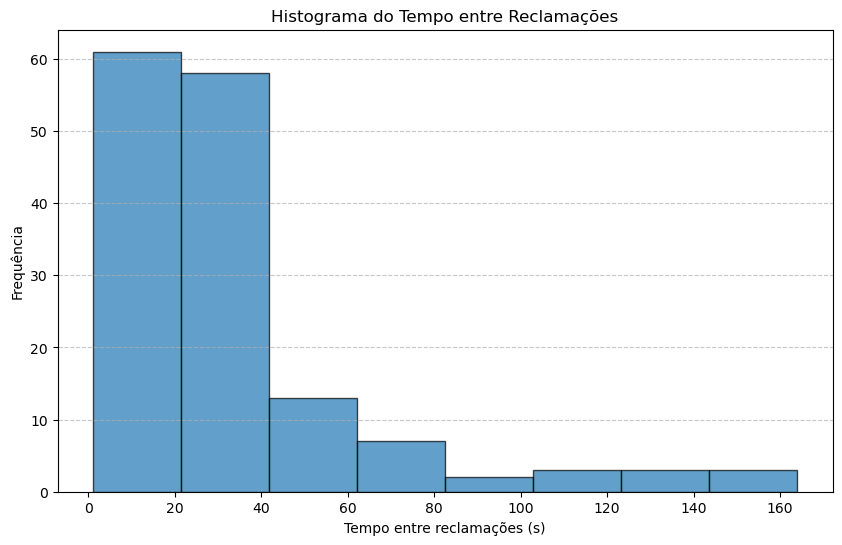

3.7) Estatística:
Média: 33.5, Mediana: 24.0, Q1: 14.0, Q3: 38.0
Variância: 1051.6, Desvio Padrão: 32.4, Coef. Variação: 96.9%

3.8) Assimetria: 2.186432, Curtose: 5.2


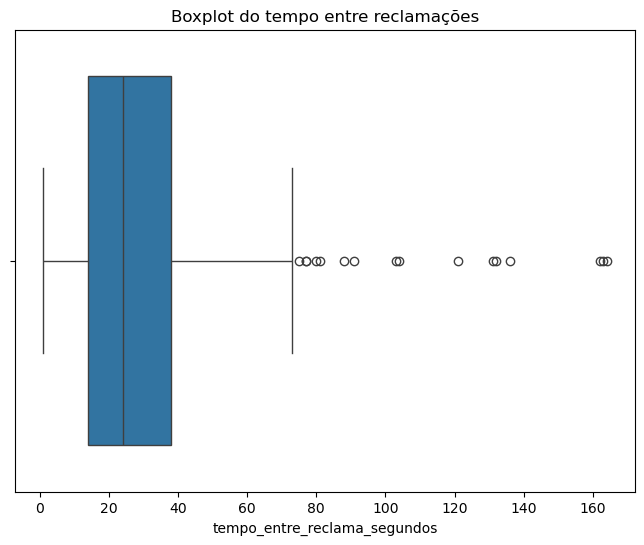

3.9) A boxplot permite identificar valores atípicos e a dispersão dos dados.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analisar_satisfacao_clientes(ficheiro_csv, num_classes):
    df = pd.read_csv(ficheiro_csv)
    dados = df.iloc[:, 0]
    print("3.1) A variável é quantitativa contínua, pois mede o tempo entre reclamações.")
    print(f"")

    valor_max = dados.max()
    valor_min = dados.min()
    print(f"3.2) Valor mínimo: {valor_min}, Valor máximo: {valor_max}")
    print(f"")
    
    amplitude_total = valor_max - valor_min
    amplitude_classe = amplitude_total / num_classes
    print(f"3.4) Amplitude da classe: {amplitude_classe:.2f}")
    print(f"")

    intervalos = np.linspace(valor_min, valor_max, num_classes +1)
    df_freq = pd.cut(dados, bins=intervalos, right=False).value_counts().sort_index()
    freq_abs = df_freq.values
    freq_rel = freq_abs / len(dados) * 100
    freq_abs_acum = np.cumsum(freq_abs)

    tabela_frequencias = pd.DataFrame({
        "Intervalo": df_freq.index.astype(str),
        "Frequência Absoluta": freq_abs,
        "Frequência Relativa (%)": freq_rel,
        "Frequência Absoluta Acumulada": freq_abs_acum
    })

    print("3.5) Tabela de Frequências:")
    print(tabela_frequencias)

    plt.figure(figsize=(10,6))
    plt.hist(dados, bins=intervalos, edgecolor='black', alpha=0.7)
    plt.xlabel("Tempo entre reclamações (s)")
    plt.ylabel("Frequência")
    plt.title("Histograma do Tempo entre Reclamações")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    media = dados.mean()
    mediana = dados.median()
    q1 = dados.quantile(0.25)
    q3 = dados.quantile(0.75)
    variancia = dados.var()
    desvio_padrao = dados.std()
    coef_variacao = (desvio_padrao / media) * 100

    print(f"3.7) Estatística:")
    print(f"Média: {media:.1f}, Mediana: {mediana:.1f}, Q1: {q1:.1f}, Q3: {q3:.1f}")
    print(f"Variância: {variancia:.1f}, Desvio Padrão: {desvio_padrao:.1f}, Coef. Variação: {coef_variacao:.1f}%")
    print(f"")

    assimetria = dados.skew()
    curtose = dados.kurt()
    print(f"3.8) Assimetria: {assimetria:1f}, Curtose: {curtose:.1f}")

    plt.figure(figsize=(8,6))
    sns.boxplot(x=dados)
    plt.title("Boxplot do tempo entre reclamações")
    plt.show()

    print("3.9) A boxplot permite identificar valores atípicos e a dispersão dos dados.")

ficheiro_csv = "/Users/josecarneiro/LEI_ISEP/SEMESTRE_2/MATCP/CSV´s/Dados para exercicio 3.csv"
num_classes = int(input("Digite o número de classes: "))
analisar_satisfacao_clientes(ficheiro_csv, num_classes)


## EXERCÍCIO 4

4.1) Hisgramas de classes (4, 8, 16)


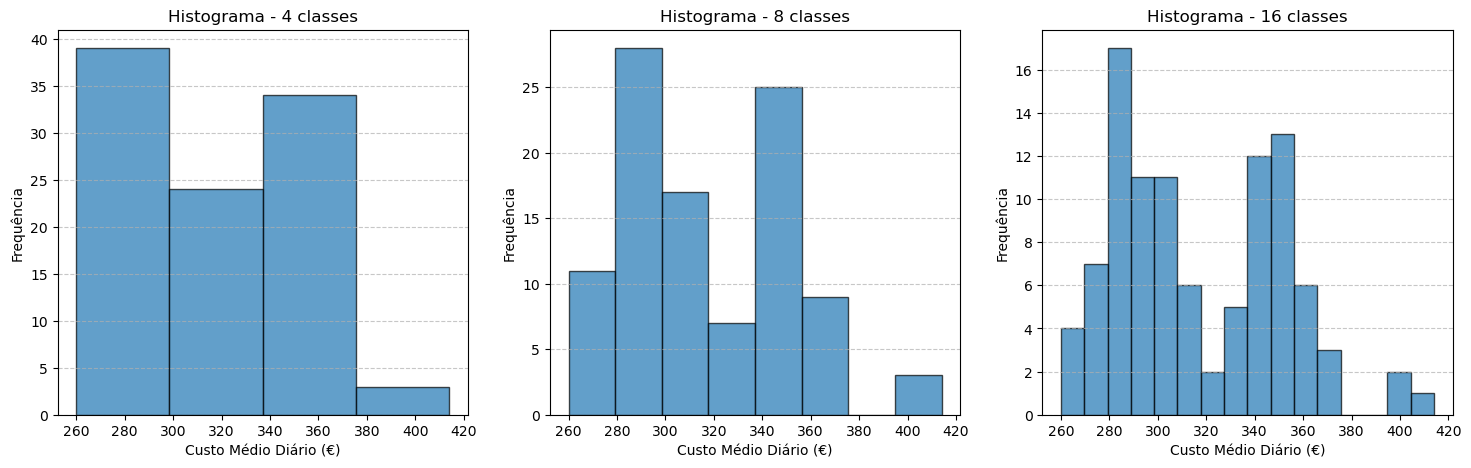

4.2) Estatísticas:
Média 317.56, Mediana 309.50, Moda: 283.00, Amplitude Interquartil: 59.25
Variância: 1179.95, Desvio Padrão: 34.35, Coef. Variação 10.82%

4.3) Assimetria e Curtose:
Assimetria: 0.42, Curtose: -0.58


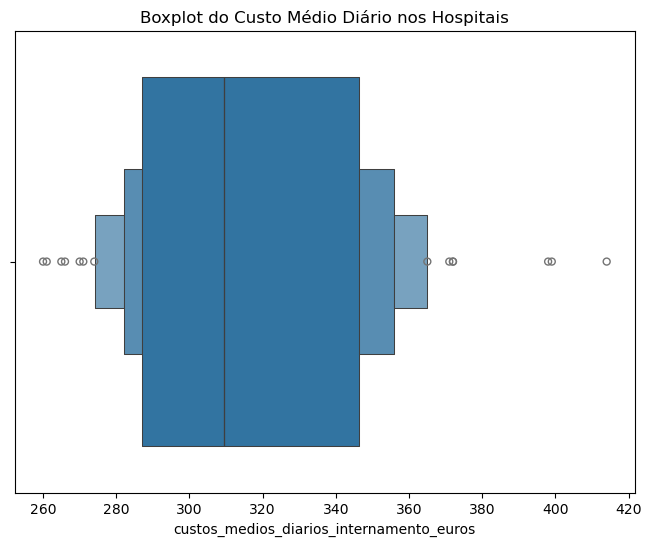

4.4) A boxplot permite identificar valores atípicos e a dispersão dos dados.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analise_saude_publica(ficheiro_csv):
    df = pd.read_csv(ficheiro_csv)
    dados = df.iloc[:, 0]
    
    print(f"4.1) Hisgramas de classes (4, 8, 16)")
    plt.figure(figsize=(18,5))
    for i, num_classes in enumerate([4, 8, 16], 1):
        plt.subplot(1,3, i)
        plt.hist(dados, bins=num_classes, edgecolor='black', alpha= 0.7)
        plt.xlabel("Custo Médio Diário (€)")
        plt.ylabel("Frequência") 
        plt.title(f"Histograma - {num_classes} classes")  
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    media = dados.mean()
    mediana = dados.median()
    moda = dados.mode()[0] if not dados.mode().empty else None
    q1 = dados.quantile(0.25)
    q3 = dados.quantile(0.75)
    amplitude_interquartil = q3 - q1
    variancia = dados.var()
    desvio_padrao = dados.std()
    coef_variacao = (desvio_padrao / media) * 100

    print("4.2) Estatísticas:")
    print(f"Média {media:.2f}, Mediana {mediana:.2f}, Moda: {moda:.2f}, Amplitude Interquartil: {amplitude_interquartil:.2f}")
    print(f"Variância: {variancia:.2f}, Desvio Padrão: {desvio_padrao:.2f}, Coef. Variação {coef_variacao:.2f}%")
    print(f"")

    assimetria = dados.skew()
    curtose = dados.kurt()
    print("4.3) Assimetria e Curtose:")
    print(f"Assimetria: {assimetria:.2f}, Curtose: {curtose:.2f}")

    plt.figure(figsize=(8, 6))
    sns.boxenplot(x=dados)
    plt.title("Boxplot do Custo Médio Diário nos Hospitais")
    plt.show()

    print("4.4) A boxplot permite identificar valores atípicos e a dispersão dos dados.")

ficheiro_csv = "/Users/josecarneiro/LEI_ISEP/SEMESTRE_2/MATCP/CSV´s/Dados para exercicio 4.csv"
analise_saude_publica(ficheiro_csv)

## EXERCÍCIO 5

5.1) Hisgramas de Variação de Ações


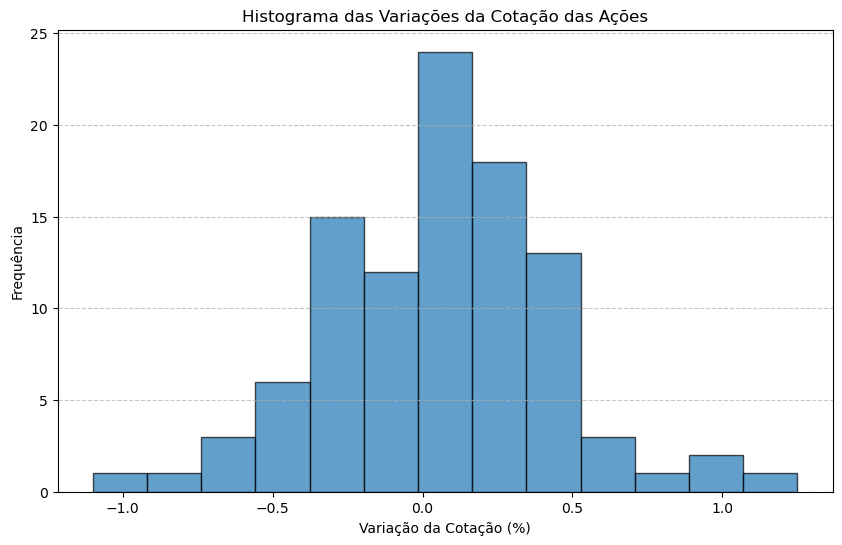

5.2) Estatísticas:
Média: 0.06, Mediana: 0.07, Moda: 0.04

5.3) Percentil 10 (P10): -0.40
O percentil 10 indica que 10% das empresas tiveram variações abaixo deste valor.



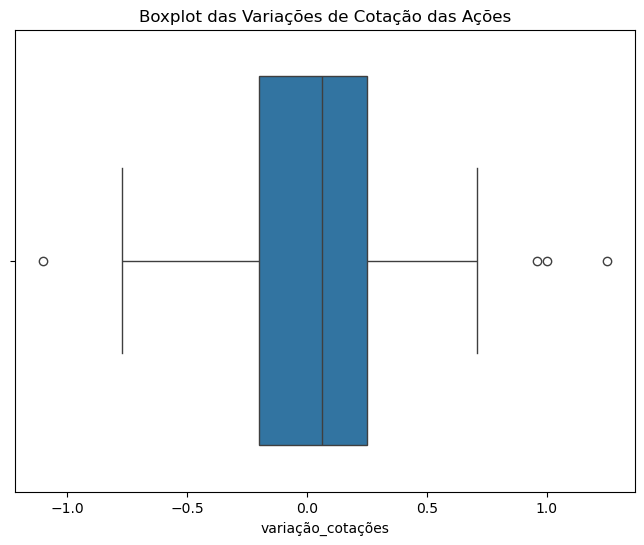

5.4) A boxplot permite visualizar a distribuição das variações e identificar valores atípicos.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analisar_variacao_das_cotacoes_das_acoes(ficheiro_csv):
    df = pd.read_csv(ficheiro_csv)
    dados = df.iloc[:, 0]

    print(f"5.1) Hisgramas de Variação de Ações")
    
    plt.figure(figsize=(10,6))
    plt.hist(dados, bins='auto', edgecolor='black', alpha=0.7)
    plt.xlabel("Variação da Cotação (%)")
    plt.ylabel("Frequência")
    plt.title("Histograma das Variações da Cotação das Ações")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    media = dados.mean()
    mediana = dados.median()
    moda = dados.mode()[0] if not dados.mode().empty else None
    print("5.2) Estatísticas:")
    print(f"Média: {media:.2f}, Mediana: {mediana:.2f}, Moda: {moda:.2f}")
    print(f"")

    p10 = np.percentile(dados, 10)
    print(f"5.3) Percentil 10 (P10): {p10:.2f}")
    print("O percentil 10 indica que 10% das empresas tiveram variações abaixo deste valor.")
    print(f"")

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dados)
    plt.title("Boxplot das Variações de Cotação das Ações")
    plt.show()

    print("5.4) A boxplot permite visualizar a distribuição das variações e identificar valores atípicos.")

ficheiro_csv = "/Users/josecarneiro/LEI_ISEP/SEMESTRE_2/MATCP/CSV´s/Dados para exercicio 5.csv"
analisar_variacao_das_cotacoes_das_acoes(ficheiro_csv)


## EXERCÍCIO 6

6.1) A variável é quantitativa discreta 

6.2) i) Tabela de Frequências:
           Intervalo  Frequência Absoluta  Frequência Relativa (%)  \
0       [0.0, 0.933)                    6                13.043478   
1     [0.933, 1.867)                    2                 4.347826   
2       [1.867, 2.8)                   10                21.739130   
3       [2.8, 3.733)                    6                13.043478   
4     [3.733, 4.667)                    8                17.391304   
5       [4.667, 5.6)                    5                10.869565   
6       [5.6, 6.533)                    5                10.869565   
7     [6.533, 7.467)                    1                 2.173913   
8       [7.467, 8.4)                    1                 2.173913   
9       [8.4, 9.333)                    0                 0.000000   
10   [9.333, 10.267)                    1                 2.173913   
11    [10.267, 11.2)                    0                 0.000000   
12    [11.2, 12.1

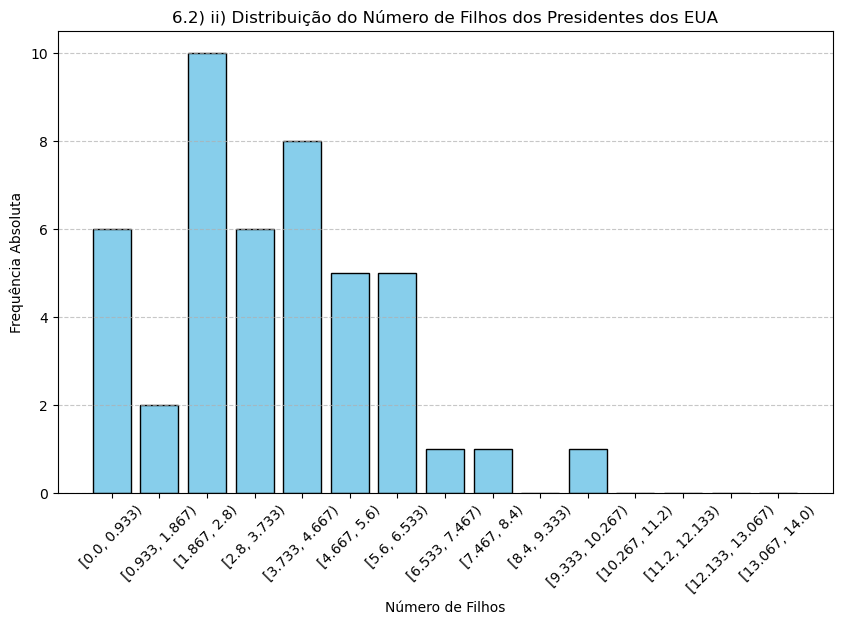

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analisar_numero_filhos(num_classes=15):
    filhos = [0, 5, 6, 0, 2, 4, 0, 4, 10, 14,
              0, 6, 2, 3, 0, 4, 5, 4, 8, 7,
              3, 5, 3, 5, 2, 6, 3, 3, 0, 2,
              2, 6, 1, 2, 3, 2, 2, 4, 4, 4,
              6, 1, 2, 2, 5, 4]

    valor_max = max(filhos)
    valor_min = min(filhos)

    print(f"6.1) A variável é quantitativa discreta.")
    print(f"")

    intervalos = np.linspace(valor_min, valor_max, num_classes + 1)
    df_freq = pd.cut(filhos, bins=intervalos, right=False).value_counts().sort_index()
    freq_abs = df_freq.values
    freq_rel = freq_abs / len(filhos) * 100
    freq_abs_acum = np.cumsum(freq_abs)
    
    tabela_frequencias = pd.DataFrame({
        "Intervalo": df_freq.index.astype(str),
        "Frequência Absoluta": freq_abs,
        "Frequência Relativa (%)": freq_rel,
        "Frequência Absoluta Acumulada": freq_abs_acum
    })
    
    print("6.2) i) Tabela de Frequências:")
    print(tabela_frequencias)
    
    plt.figure(figsize=(10, 6))
    plt.bar(df_freq.index.astype(str), freq_abs, color='skyblue', edgecolor='black')
    plt.xlabel("Número de Filhos")
    plt.ylabel("Frequência Absoluta")
    plt.title("6.2) ii) Distribuição do Número de Filhos dos Presidentes dos EUA")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

analisar_numero_filhos()

## EXERCÍCIO 7

7.1) A variável é quantitativa, porque as cores não são números e sim uma categotia.

7.2) Tabela de Frequências:
        Cor  Frequência Absoluta  Frequência Relativa (%)
0    branco                   73                     36.5
1     preto                   42                     21.0
2  vermelho                   33                     16.5
3  cinzento                   27                     13.5
4     verde                   25                     12.5



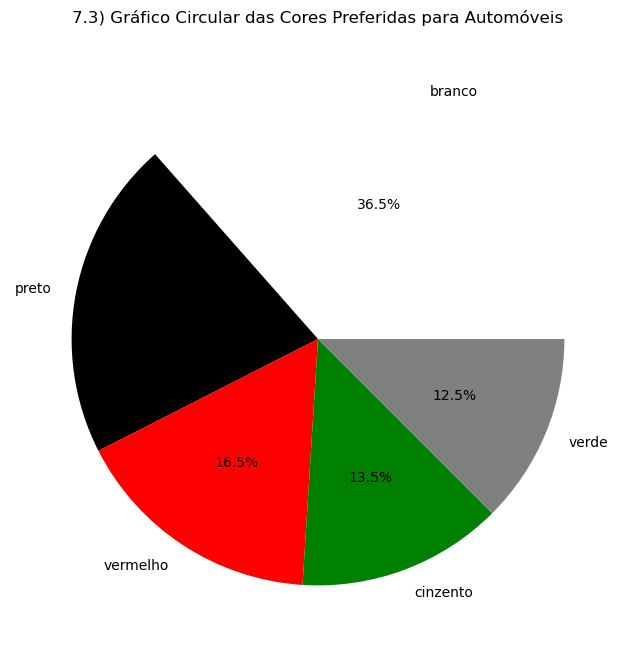

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

def analisar_cores_preferidas(ficheiro_csv):
    df = pd.read_csv(ficheiro_csv)
    
    tabela_frequencias = df.iloc[:, 0].value_counts().reset_index()
    tabela_frequencias.columns = ['Cor', 'Frequência Absoluta']
    tabela_frequencias['Frequência Relativa (%)'] = (tabela_frequencias['Frequência Absoluta'] / tabela_frequencias['Frequência Absoluta'].sum()) * 100

    print("7.1) A variável é quantitativa, porque as cores não são números e sim uma categotia.")
    print(f"")

    print("7.2) Tabela de Frequências:")
    print(tabela_frequencias)
    print(f"")

    plt.figure(figsize=(8, 8))
    plt.pie(tabela_frequencias['Frequência Absoluta'], labels=tabela_frequencias['Cor'], autopct='%1.1f%%', colors=['white', 'black', 'red', 'green', 'gray'])
    plt.title("7.3) Gráfico Circular das Cores Preferidas para Automóveis")
    plt.show()

ficheiro_csv_cores = "/Users/josecarneiro/LEI_ISEP/SEMESTRE_2/MATCP/CSV´s/Dados para exercicio 7.csv"
analisar_cores_preferidas(ficheiro_csv_cores)